In [9]:
import importlib
import modules

importlib.reload(modules)

from modules import CA
import matplotlib.pyplot as plt


Transient length: no transient found


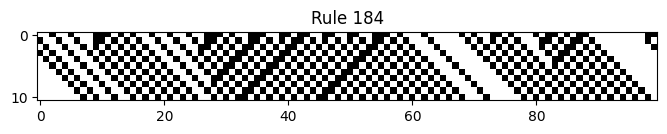

In [10]:
ca_184 = CA()

p = 0.5
L = 100
initial_state = ca_184.gen_initial_state_bernoulli(L, p)
lambda_parameter, evolution = ca_184.gen_CA(L, r=1, k=2, dec_rule=184, t_end=10, s_q='0')
transient_length = ca_184.calculate_transient_length()

plt.figure(figsize=(8,10))
plt.title(f'Rule 184')
plt.imshow(evolution, cmap='binary')

print(f"Transient length: {transient_length}")


In [11]:
import cellpylib as cpl
import numpy as np

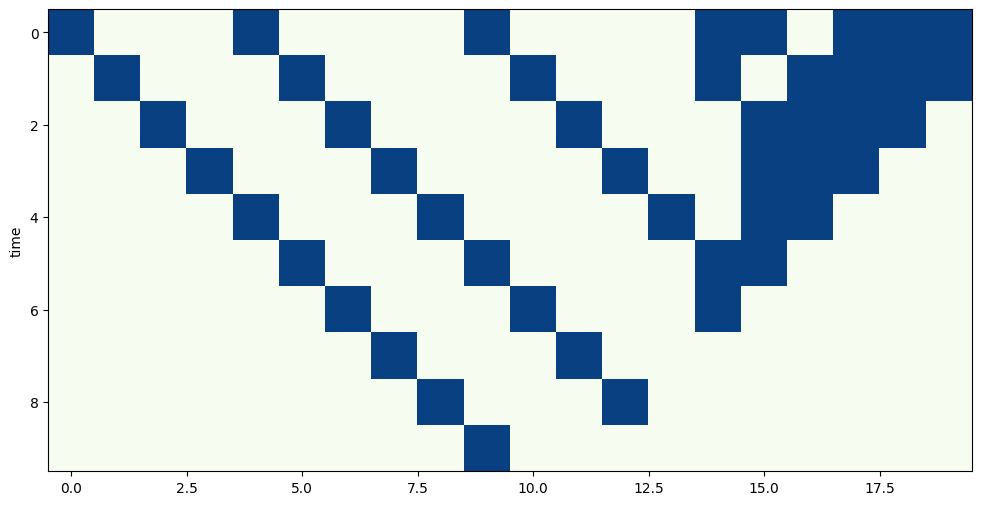

In [12]:
importlib.reload(modules)
from modules import triangulize_evolution

p = 0.5
L = 20
T = int(L / 2)
initial_state = ca_184.gen_initial_state_bernoulli(L, p)

# print(cellular_automaton)
cellular_automaton = cpl.evolve(initial_state, timesteps=T, memoize=True, apply_rule=lambda n, c, t: cpl.nks_rule(n, rule=184))
cellular_automaton = triangulize_evolution(cellular_automaton)

fig, ax = plt.subplots(figsize=(12, 6))  # Adjust the size as needed
cpl.plot(cellular_automaton, colormap='GnBu')



In [13]:
importlib.reload(modules)
from modules import find_jams

jams = find_jams(cellular_automaton)
print(f"The jams in the evolution above are: {jams}")
print(f"\'[[i, j], size]\' with i and j being the row coordinates in the row that the jam was last found in and size being the size of the jam.")
jam_sizes = [jam[1] for jam in jams]
print(f"Jam sizes: {jam_sizes}")

The jams in the evolution above are: [[[14, 15], 2], [[14, 15], 14]]
'[[i, j], size]' with i and j being the row coordinates in the row that the jam was last found in and size being the size of the jam.
Jam sizes: [2, 14]


[1, 2, 1, 2, 3, 4, 5, 6, 5, 4]


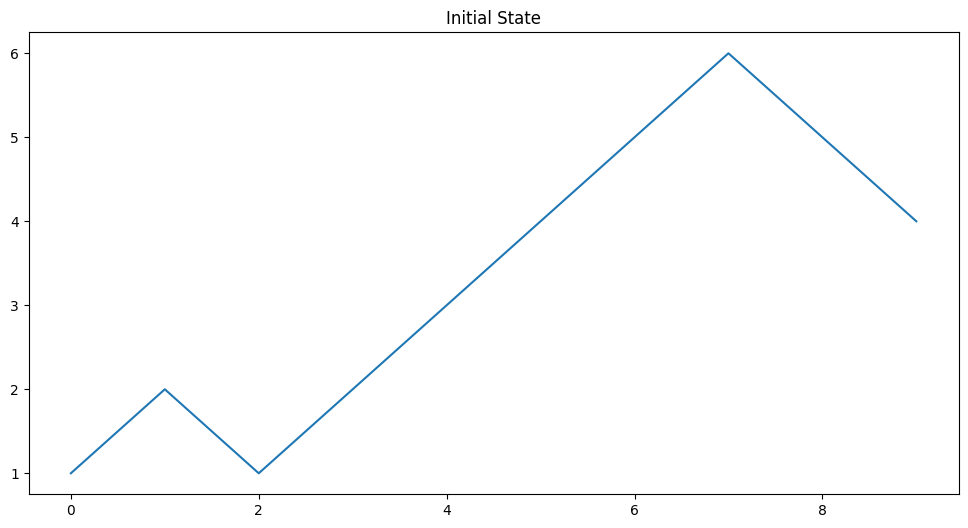

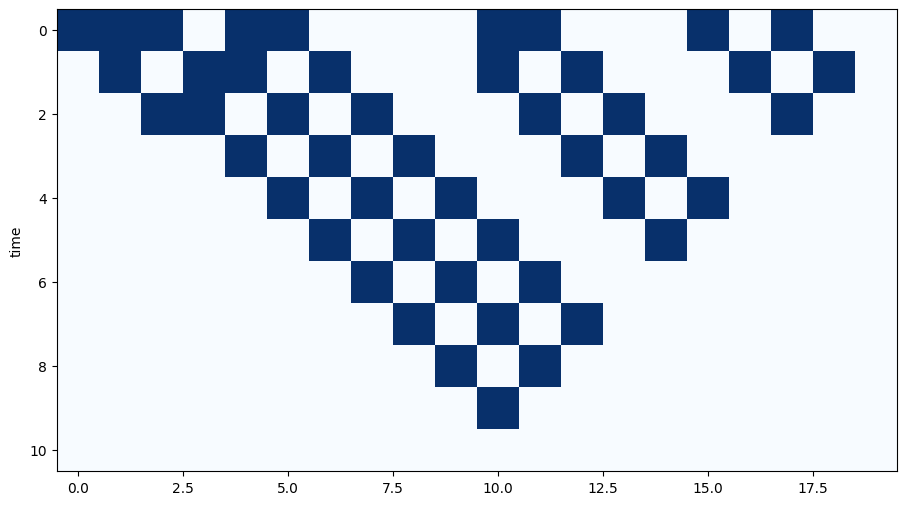

In [14]:
importlib.reload(modules)
from modules import triangulize_evolution
from modules import initial_to_random_walk

# Plot the random walk that is the initial state, go up for 1, down for 0
initial_state = np.array([[1, 1, 0, 1, 1, 1, 1, 1, 0, 0]])
random_walk = initial_to_random_walk(initial_state)
print(random_walk)
plt.figure(figsize=(12,6))
plt.title(f'Initial State')
plt.plot(random_walk)

_, cellular_automaton = ca_184.gen_CA(L, r=1, k=2, dec_rule=184, t_end=10, s_q='0')
# cellular_automaton = cpl.evolve(initial_state, timesteps=T, memoize=True, apply_rule=lambda n, c, t: cpl.nks_rule(n, rule=184))
cellular_automaton = triangulize_evolution(cellular_automaton)

fig, ax = plt.subplots(figsize=(12, 6))  # Adjust the size as needed
cpl.plot(cellular_automaton, colormap='Blues')





In [15]:
import scipy.optimize as opt
importlib.reload(modules)
from modules import run_model
from modules import run_model_stochastic

p = 0.5
L = 1000
T = int(L / 2)
n = 100

lifespan_counter, jam_size_counter = run_model_stochastic(p, L, T, n)

plt.figure(figsize=(12,6))
plt.title(f'Jam Lifespans')
plt.loglog(range(1, int(max(lifespan_counter.keys()))), [lifespan_counter[i] for i in range(1, int(max(lifespan_counter.keys())))], 'o')
plt.xlabel('Jam lifespan')
plt.ylabel('Number of jams')

# Add a vertical line at T
plt.axvline(x=T, color='red', linestyle='--')
plt.show()

plt.figure(figsize=(12,6))
plt.title(f'Jam Sizes')
plt.loglog(range(1, int(max(jam_size_counter.keys()))), [jam_size_counter[i] for i in range(1, int(max(jam_size_counter.keys())))], 'o')
plt.xlabel('Jam size')
plt.ylabel('Number of jams')
plt.show()

# Try various fitting methods
def power_law_cutoff_func(x, a, b):
    return x** -a * np.exp(-b * x) 

jam_size_counter = sorted(jam_size_counter.items())

print(jam_size_counter)

x = np.array([i[0] for i in jam_size_counter])
y = np.array([i[1] for i in jam_size_counter])

def linear_func(x, a, b):
    return a * x + b

log_x, log_y = np.log(x), np.log(y)

# Take only 80% of the data to fit the line
x = x[:int(len(x) * 0.8)]
y = y[:int(len(y) * 0.8)]
log_x = log_x[:int(len(log_x) * 0.8)]
log_y = log_y[:int(len(log_y) * 0.8)]

# Fit a line to the log-log plot
popt, pcov = opt.curve_fit(linear_func, log_x, log_y)

# Plot the log-log plot
plt.figure(figsize=(12,6))
plt.title(f'Jam Sizes')
plt.loglog(x, y, 'o')
plt.loglog(x, np.exp(linear_func(log_x, *popt)), '--')
plt.xlabel('Jam size')
plt.ylabel('Number of jams')
plt.show()



KeyboardInterrupt: 

In [ ]:
# importlib.reload(modules)
# from modules import run_model_for_densities

# p_values = np.linspace(0.4, 0.6, 50) 
# p_repetitions = 10
# L = 1000
# T = int(L / 2)
# n = 20

# output = run_model_for_densities(p_values, L, T, p_repetitions, n, concurrently=True)
# print(output)

# # save the output to a csv file
# import pandas as pd
# df = pd.DataFrame(output)
# df.to_csv('output.csv', index=False)

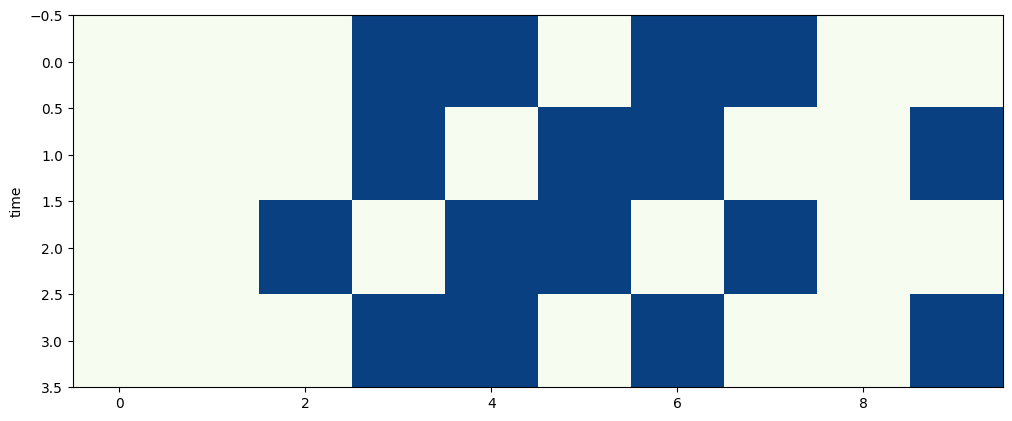

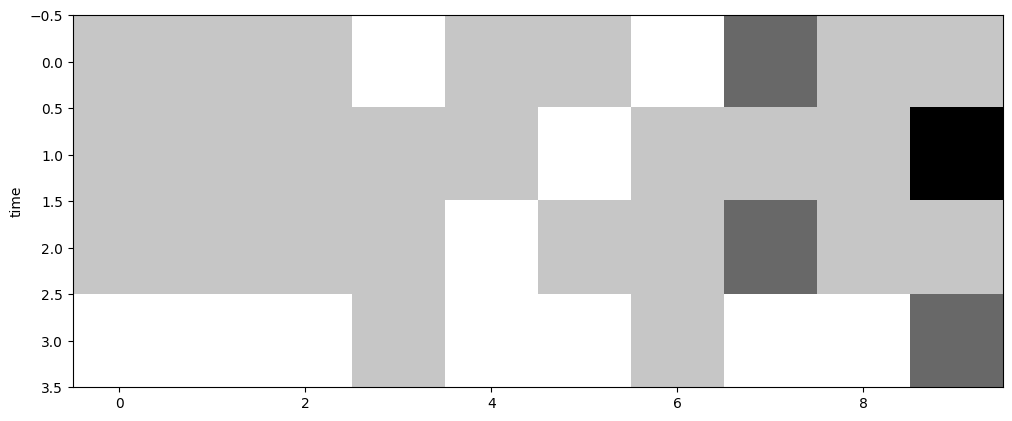

Flow: 12


In [21]:
importlib.reload(modules)
from modules import run_model_stochastic
from modules import calculate_flow_nasch

p = 0.4
L = 10
T = int(L / 2)
T = 3
n = 1

lifespan_counter, jam_size_counter, evolutions = run_model_stochastic(p, L, T, n, v_max=3, p_slowdown = 0, return_evolutions=True)

# plt.figure(figsize=(12,6))
# plt.title(f'Jam Lifespans')
# plt.loglog(range(1, int(max(lifespan_counter.keys()))), [lifespan_counter[i] for i in range(1, int(max(lifespan_counter.keys())))], 'o')
# plt.xlabel('Jam lifespan')
# plt.ylabel('Number of jams')

# # Add a vertical line at T
# plt.axvline(x=T, color='red', linestyle='--')
# plt.show()

# plt.figure(figsize=(12,6))
# plt.title(f'Jam Sizes')
# plt.loglog(range(1, int(max(jam_size_counter.keys()))), [jam_size_counter[i] for i in range(1, int(max(jam_size_counter.keys())))], 'o')
# plt.xlabel('Jam size')
# plt.ylabel('Number of jams')
# plt.show()

evolution = evolutions[0]
    
location_evolution = [[x[0] for x in line] for line in evolution]
speed_evolution = [[x[1] for x in line] for line in evolution]

flow = calculate_flow_nasch(evolution)

# plot the car evolution
fig, ax = plt.subplots(figsize=(12, 6))  # Adjust the size as needed
cpl.plot(location_evolution, colormap='GnBu')

fig, ax = plt.subplots(figsize=(12, 6))  # Adjust the size as needed
cpl.plot(speed_evolution, colormap='Grays')

print(f"Flow: {flow}")




Critical density: 0.26530612244897955


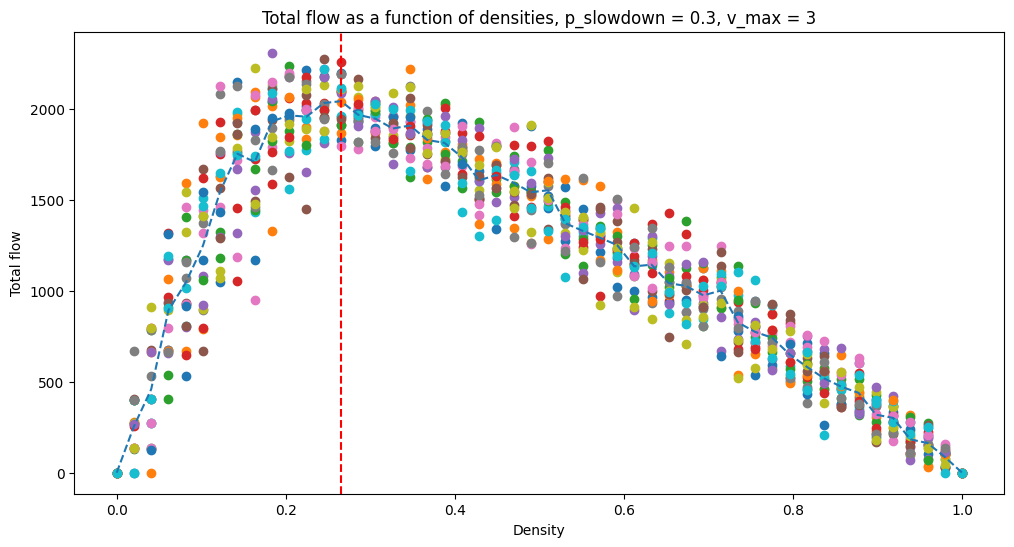

In [23]:
importlib.reload(modules)
from modules import run_model_stochastic
from modules import calculate_flow_nasch

p = np.linspace(0.0, 1, 50)
L = 100
T = int(L / 2)
n = 20
p_slowdown = 0.3
v_max = 3

total_flows_per_density = dict()
average_flows_per_density = dict()

for density in p:
    lifespan_counter, jam_size_counter, evolutions = run_model_stochastic(density, L, T, n, v_max=v_max, p_slowdown = p_slowdown, return_evolutions=True)
    

    total_flows = [calculate_flow_nasch(evolution) for evolution in evolutions]
    average_flows = [flow / float(T) for flow in total_flows]
    
    total_flows_per_density[density] = total_flows
    average_flows_per_density[density] = average_flows

# Find critical point: the density for which the total flow average is maximum
mean_total_flow_per_density = {density: np.mean(flows) for density, flows in total_flows_per_density.items()}
critical_density = max(mean_total_flow_per_density, key=mean_total_flow_per_density.get)
print(f"Critical density: {critical_density}")

# plot total flow as a function of densities
plt.figure(figsize=(12,6))
plt.title(f'Total flow as a function of densities, p_slowdown = {p_slowdown}, v_max = {v_max}')
plt.plot(total_flows_per_density.keys(), total_flows_per_density.values(), 'o')
plt.plot(total_flows_per_density.keys(), [np.mean(flows) for flows in total_flows_per_density.values()], '--')

# Add a vertical line at the critical density
plt.axvline(x=critical_density, color='red', linestyle='--')

plt.xlabel('Density')
plt.ylabel('Total flow')
plt.show()








In [ ]:
import pandas as pd
importlib.reload(modules)
from modules import find_critical_dataframe_nasch

p_values = np.linspace(0.0, 1, 50)
L = 300
T = int(L / 2)
n = 20
p_slowdown_values = np.linspace(0.0, 1, 50)
v_max_values = [x for x in range(1, 11)]
repetitions = 5

output_df = find_critical_dataframe_nasch(p_slowdown_values, v_max_values, p_values, L, T, n, repetitions=repetitions)

# Save the output to a csv file
output_df.to_csv(f'Results\\critical_densities_nasch_n={n}_L={L}_T={T}_#p={len(p_values)}_reps={repetitions}.csv', index=False)

# Plot the output per v_max
for v_max in v_max_values:
    df = output_df[output_df[f'v_max'] == v_max]
    x = list(df['p_slowdown'])
    y = list(df['critical_density']) # multiple values per x
    y_means = [np.mean(l) for l in y]
    plt.figure(figsize=(12,6))
    plt.title(f'Critical density as a function of slowdown probability for v_max={v_max}')
    plt.plot(x, y, 'o', color='blue')
    plt.plot(x, y_means, '-', color='red')
    plt.xlabel('Slowdown probability')
    plt.ylabel('Critical density')
    plt.show()

 11%|█         | 28/250 [07:48<38:31, 10.41s/it]   

In [ ]:
print(output_df)
v_max = 1
df_filtered = output_df[output_df['v_max'] == v_max]
print(df_filtered)

    p_slowdown  v_max  critical_density
0     0.000000      1          0.632653
1     0.052632      1          0.673469
2     0.105263      1          0.428571
3     0.157895      1          0.571429
4     0.210526      1          0.571429
..         ...    ...               ...
95    0.789474      5          0.122449
96    0.842105      5          0.244898
97    0.894737      5          0.224490
98    0.947368      5          0.224490
99    1.000000      5          0.081633

[100 rows x 3 columns]
    p_slowdown  v_max  critical_density
0     0.000000      1          0.632653
1     0.052632      1          0.673469
2     0.105263      1          0.428571
3     0.157895      1          0.571429
4     0.210526      1          0.571429
5     0.263158      1          0.612245
6     0.315789      1          0.551020
7     0.368421      1          0.448980
8     0.421053      1          0.673469
9     0.473684      1          0.510204
10    0.526316      1          0.448980
11    0.578947  